In [521]:
import pandas as pd
import matplotlib.pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose


In [522]:
data = pd.read_csv('/Users/mstee/Documents/School/projectwork/data/avg_daily_temp_curated.csv')

In [523]:
data.head()

,Datum,Kvalitet,Snittemperatur,Month
0,1961-01-01,G,1.07,1961-01
1,1961-01-02,G,2.27,1961-01
2,1961-01-03,G,2.27,1961-01
3,1961-01-04,G,2.53,1961-01
4,1961-01-05,G,2.13,1961-01


Change variable types 

In [524]:
print(data.dtypes)

Datum              object
Kvalitet           object
Snittemperatur    float64
Month              object
dtype: object


In [525]:
data['Datum'] = pd.to_datetime(data['Datum'])
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data['Kvalitet'] = data['Kvalitet'].astype(str)



EDA 

In [526]:
print(data['Snittemperatur'].describe())

count    19914.000000
mean         8.608544
std          7.337632
min        -22.220000
25%          3.172500
50%          8.500000
75%         14.710000
max         27.230000
Name: Snittemperatur, dtype: float64


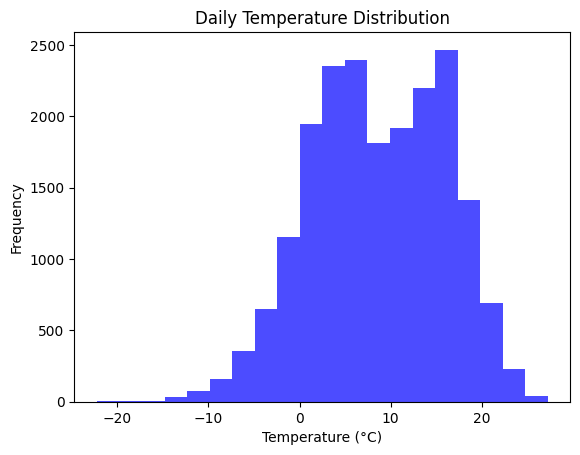

In [527]:


temperature_data = data['Snittemperatur']

# Create a histogram
plt.hist(temperature_data, bins=20, color='blue', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Daily Temperature Distribution')

plt.show()

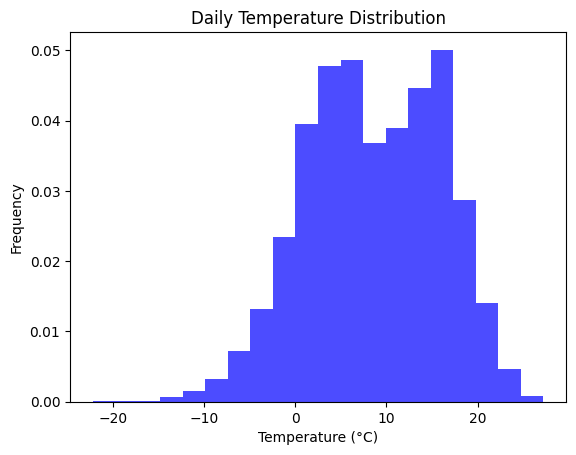

In [528]:
temperature_data = data['Snittemperatur']

# Create a histogram
plt.hist(temperature_data, bins=20, color='blue', alpha=0.7, density = True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Daily Temperature Distribution')

plt.show()

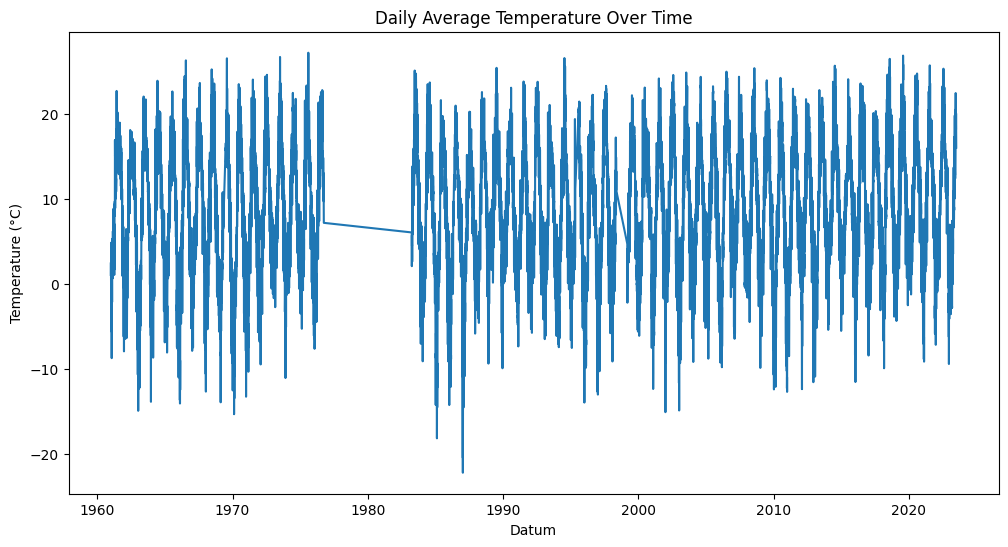

In [529]:

plt.figure(figsize=(12, 6))
plt.plot(data['Datum'], data['Snittemperatur'])
plt.xlabel('Datum')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Over Time')
plt.show()

In [530]:
data.head()

,Datum,Kvalitet,Snittemperatur,Month
0,1961-01-01,G,1.07,1961-01-01
1,1961-01-02,G,2.27,1961-01-01
2,1961-01-03,G,2.27,1961-01-01
3,1961-01-04,G,2.53,1961-01-01
4,1961-01-05,G,2.13,1961-01-01


In [531]:
noentries_subset = data[(data['Datum'] >= '1976-10-01') & (data['Datum'] <= '1983-03-30')]



In [532]:
noentries_subset

,Datum,Kvalitet,Snittemperatur,Month


In [533]:
start_date = pd.to_datetime('1976-10-01')
end_date = pd.to_datetime('1983-03-30')

# Calculate the average value for 'Snittemperatur' for the entire dataset
average_snittemperatur = data['Snittemperatur'].mean()

data.loc[(data['Datum'] >= start_date) & (data['Datum'] <= end_date), 'Snittemperatur'] = average_snittemperatur

# Now, the 'subset' DataFrame contains the updated 'Snittemperatur' values within the specified date range


Time series analysis 

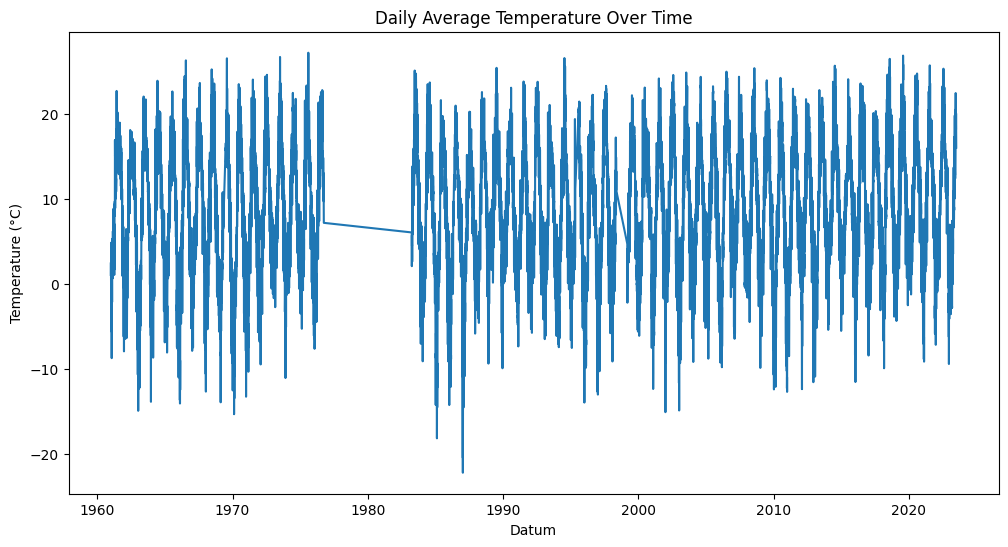

In [535]:

plt.figure(figsize=(12, 6))
plt.plot(data['Datum'], data['Snittemperatur'])
plt.xlabel('Datum')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Over Time')
plt.show()

In [400]:
decomposition = seasonal_decompose(subset['Snittemperatur'], model='additive')
trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None